# **MADRID POBLACIÓN**

## **Importamos** librerías y dataset desde la página oficial de madrid.org

In [2]:
import pandas as pd
import seaborn as sns

In [7]:
# Cargamos los nuevos archivos correctos
df_resto = pd.read_csv("./data/export_by_vsc/Madrid_resto_por_distrito.csv")
df_pob = pd.read_csv("./data/export_by_vsc/Madrid_pob_district24.csv")

# Mostramos unas filas para verificar estructura
df_resto.head(), df_pob.head()

(   cod_distrito    distrito                                       geometry  \
 0             1      Centro   POINT (-412316.261949206 4926652.8056437345)   
 1             2  Arganzuela   POINT (-411603.817208129 4924079.7936662575)   
 2             3      Retiro  POINT (-409288.37179962895 4925848.667118731)   
 3             4   Salamanca   POINT (-409433.0871376602 4928583.006342677)   
 4             5   Chamartín   POINT (-409444.2190867395 4931815.478580107)   
 
    num_restaurantes  
 0              1363  
 1               243  
 2               136  
 3               403  
 4               170  ,
    fecha  cod_distrito    distrito  num_personas  \
 0   2024             1      Centro        145411   
 1   2024             2  Arganzuela        156559   
 2   2024             3      Retiro        119757   
 3   2024             4   Salamanca        149778   
 4   2024             5   Chamartín        148111   
 
                                         geometry  
 0   POINT (-

---
## **Unimos** los dataframes y los limpiamos un poco

In [68]:
# Unimos ambos dataframes por cod_distrito
df_merge = pd.merge(df_pob, df_resto[["cod_distrito", "num_restaurantes"]], on="cod_distrito", how="inner")

# Calculamos la tasa de restaurantes por cada 1000 personas
df_merge["Tasa de rest/1000p"] = df_merge["num_restaurantes"] / df_merge["num_personas"] * 1000
df_merge = df_merge.set_index("distrito")
df_merge.drop(["fecha", "cod_distrito", "geometry"], axis=1, inplace=True)
df_merge.sort_values("Tasa de rest/1000p", ascending=False)

,num_personas,num_restaurantes,Tasa de rest/1000p
distrito,,,
Centro,145411,1363,9.373431
Chamberí,141984,628,4.423034
Salamanca,149778,403,2.690649
Tetuán,166211,371,2.232103
Arganzuela,156559,243,1.552131
Barajas,49612,75,1.511731
Chamartín,148111,170,1.147788
Retiro,119757,136,1.135633
Moncloa-Aravaca,125223,102,0.814547


---
## **Pintamos** un donut

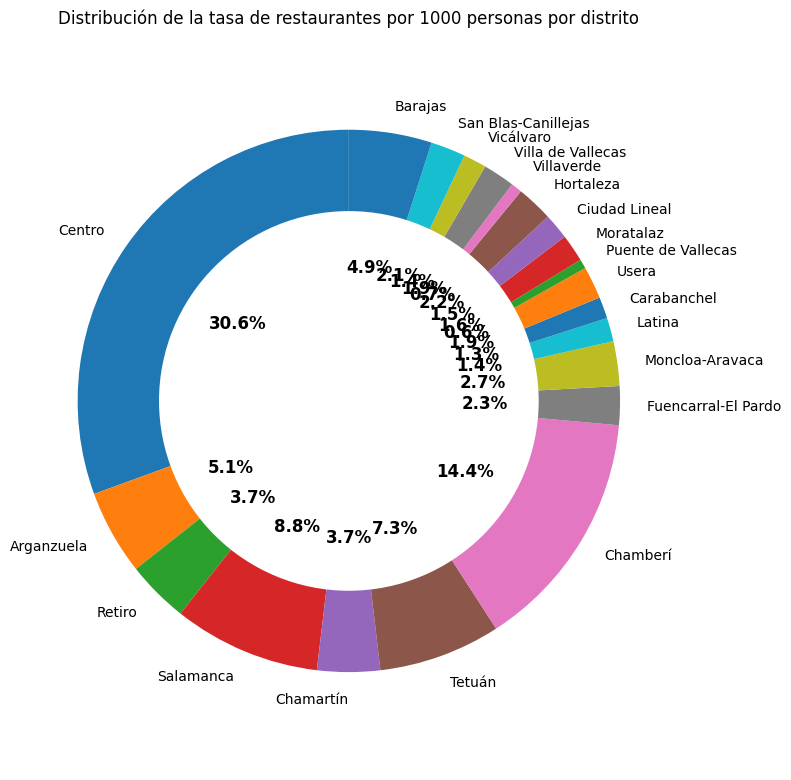

In [65]:
# Crear gráfico tipo donut
fig, ax = plt.subplots(figsize=(8, 8))

# Crear gráfico de pastel con porcentajes
wedges, texts, autotexts = ax.pie(
    df_merge["Tasa de rest/1000p"],
    labels=df_merge.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5  # más cerca del centro
)

# Dibujar círculo blanco en el centro para efecto donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Estilizar texto de los porcentajes
for autotext in autotexts:
    autotext.set_color('black')       # color blanco para contraste
    autotext.set_fontsize(12)         # tamaño más grande
    autotext.set_weight('bold')       # texto en negrita

plt.title("Distribución de la tasa de restaurantes por 1000 personas por distrito")
plt.tight_layout()
plt.show()


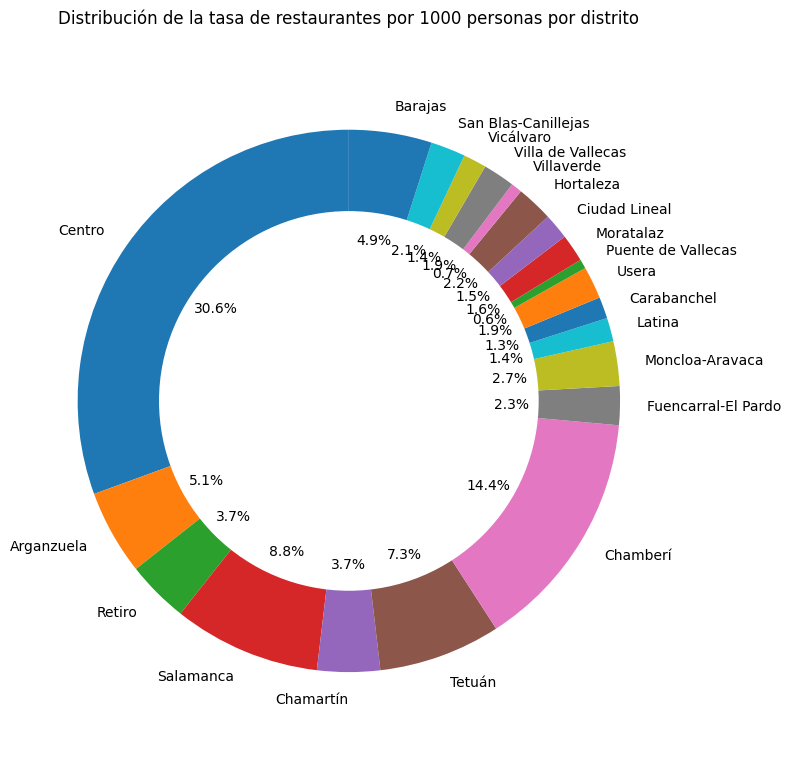

In [74]:
# Crear gráfico tipo donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(df_merge["Tasa de rest/1000p"], labels=df_merge.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title("Distribución de la tasa de restaurantes por 1000 personas por distrito")
plt.tight_layout()

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/tasa_rest_1000p_distrito.png", dpi=150, bbox_inches='tight', transparent=True)

plt.show()